## Amirhossein Kargaran Khouzani (stu no: 99201119)

## Import libraries

In [1]:
! pip install kneed

In [2]:
from sklearn import neighbors, datasets, metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
np.random.seed(5)

In [3]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

## Part 1

In [4]:
def dbScan(dataset, eps, n):
    cluster_i = -1 

    # create a sequence of zeroes showing status of dataset points(classified or not): status, and labels as clusters
    status = np.zeros(len(dataset))
    clusters = np.zeros(len(dataset))

    # create a sequence of zeroes showing count of neighbours to a sample within range eps: neighbour_count
    # from distance matrix, find all neighbours within distance eps
    possible_neigh = metrics.pairwise_distances(dataset) <= eps
    # update sequence neighbour_count
    neighbour_count = list(sum(possible_neigh))

    
    for i in range(len(dataset)):
        # if i is not classified then
        if status[i] == 0:
            # update status as labeled
            status[i] = 1
            # if neighbour_count[i] < n then this sample is clustersed -1 (noise)
            if neighbour_count[i] < n:
                clusters[i] = -1
            else:
                # this sample is labaled with cluster_i
                cluster_i += 1
                clusters[i] = cluster_i
                # create a sequence of neighbours for i: neighbourhood_members
                neighbourhood_members = list(np.where(possible_neigh[i] == True)[0])
                # while neighbourhood_members is not empty do
                while len(neighbourhood_members) > 0:
                    # consider first neighbourhood_members point and call it j
                    j = neighbourhood_members[0]
                    # update status as labeled
                    status[j] = 1
                    if(neighbour_count[j] < n):
                        clusters[j] = -1
                    else:
                        # check neighbours and extend new neighbours from each of them 
                        neighbours_j = np.where(possible_neigh[j] == True)[0]
                        for n_j in neighbours_j:
                            if n_j not in neighbourhood_members and status[n_j]== 0:
                                neighbourhood_members.append(n_j)
                        clusters[j] = cluster_i
                    # remove first point of neighbourhood_members (j)
                    neighbourhood_members.remove(j)
    return clusters

## Part 2

In [5]:
k = 4

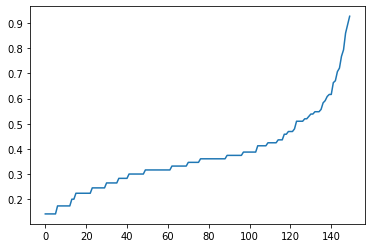

 knee y: 0.5477225575051664


In [6]:
neigh = neighbors.NearestNeighbors(n_neighbors = k)
nbrs = neigh.fit(x)
neigh_dist, neigh_ind = nbrs.kneighbors(x)
neigh_dist = sorted(neigh_dist[:,k-1])
plt.plot(neigh_dist)
plt.show()
knee_y = KneeLocator(range(len(neigh_dist)), neigh_dist, curve='convex', direction='increasing').knee_y
print(f" knee y: {knee_y}")

## Part 4

In [7]:
scratch_labels = dbScan(x, knee_y, k)

In [8]:
print(f"classification report:\n{metrics.classification_report(y, scratch_labels)}")
print(f"cohen_kappa_score: {metrics.cohen_kappa_score(y, scratch_labels)}")
print(f"confusion_matrix:\n{metrics.confusion_matrix(y, scratch_labels)}")


classification report:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       1.00      0.94      0.97        50
         1.0       0.53      0.88      0.66        50
         2.0       0.00      0.00      0.00        50

    accuracy                           0.61       150
   macro avg       0.38      0.45      0.41       150
weighted avg       0.51      0.61      0.54       150

cohen_kappa_score: 0.44339622641509435
confusion_matrix:
[[ 0  0  0  0]
 [ 3 47  0  0]
 [ 4  0 44  2]
 [11  0 39  0]]


c:\users\ferodo\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
